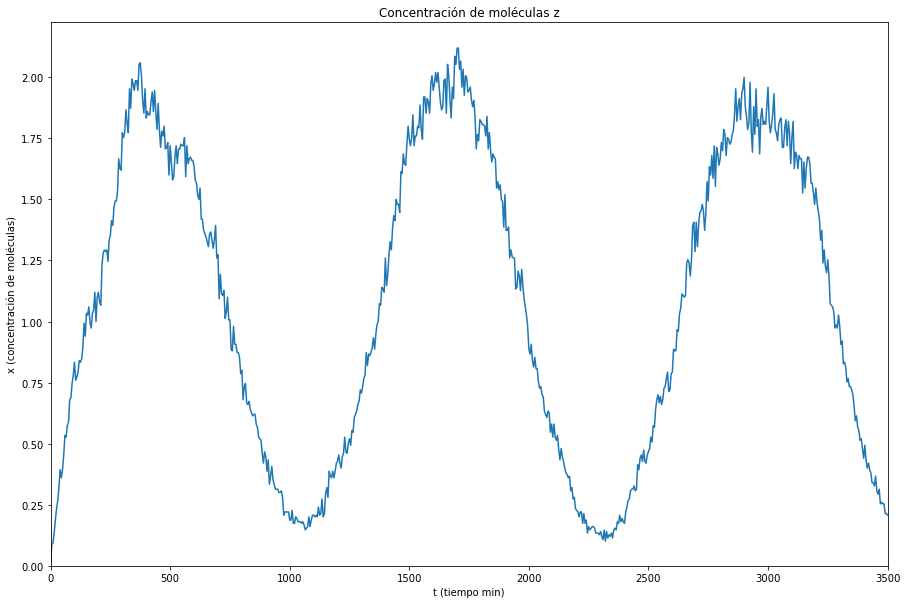

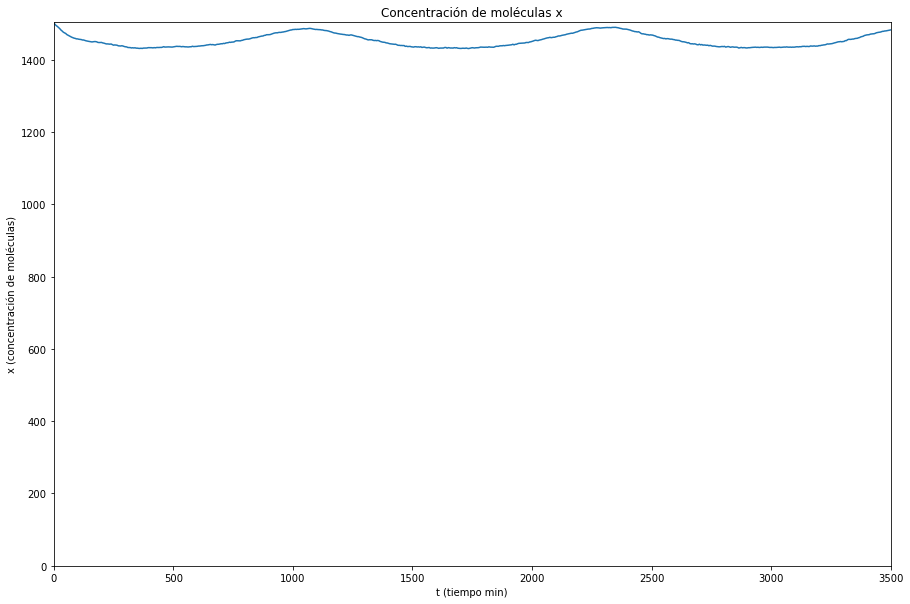

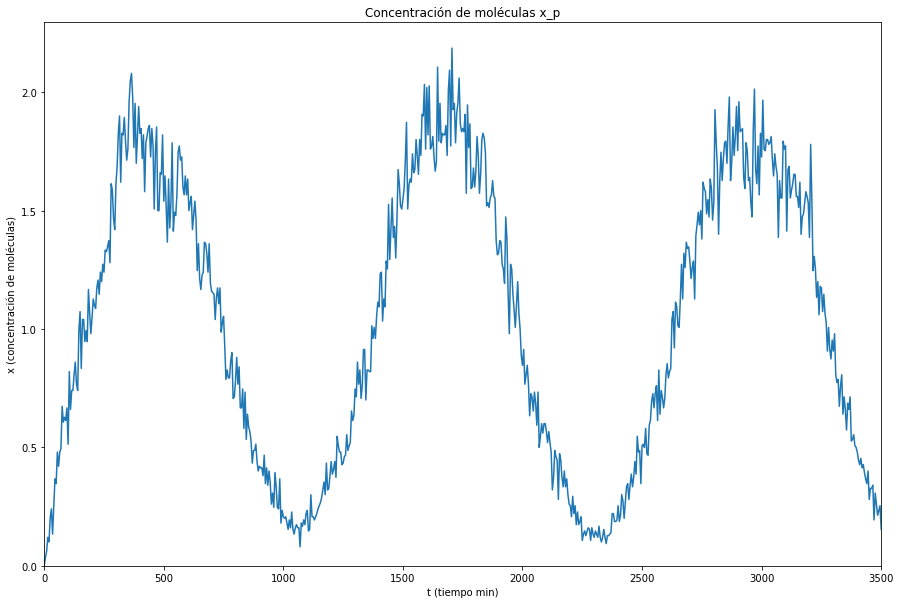

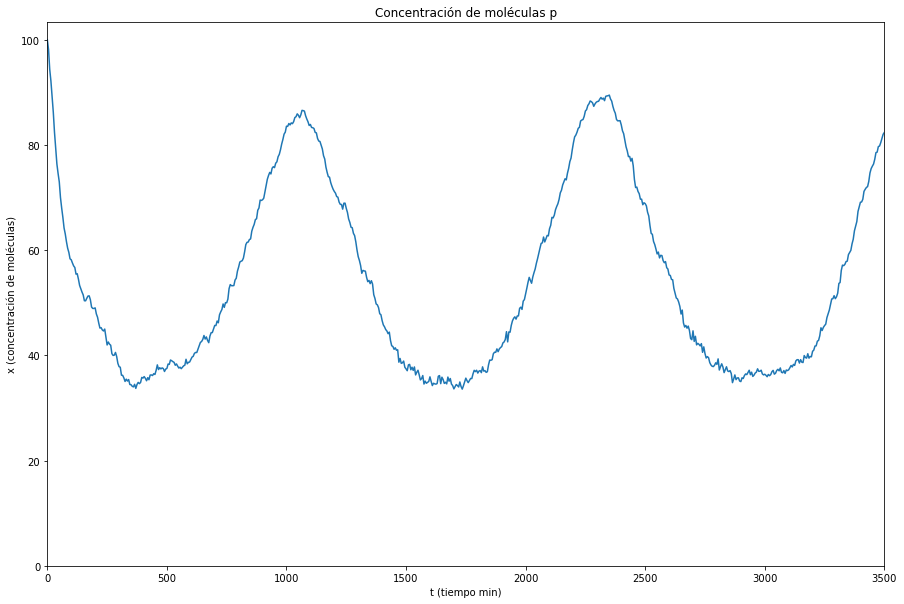

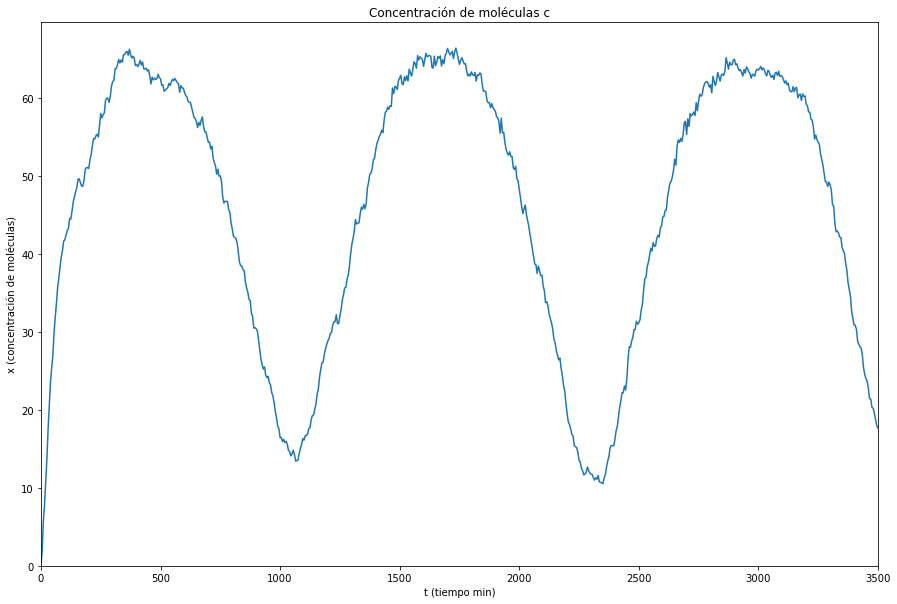

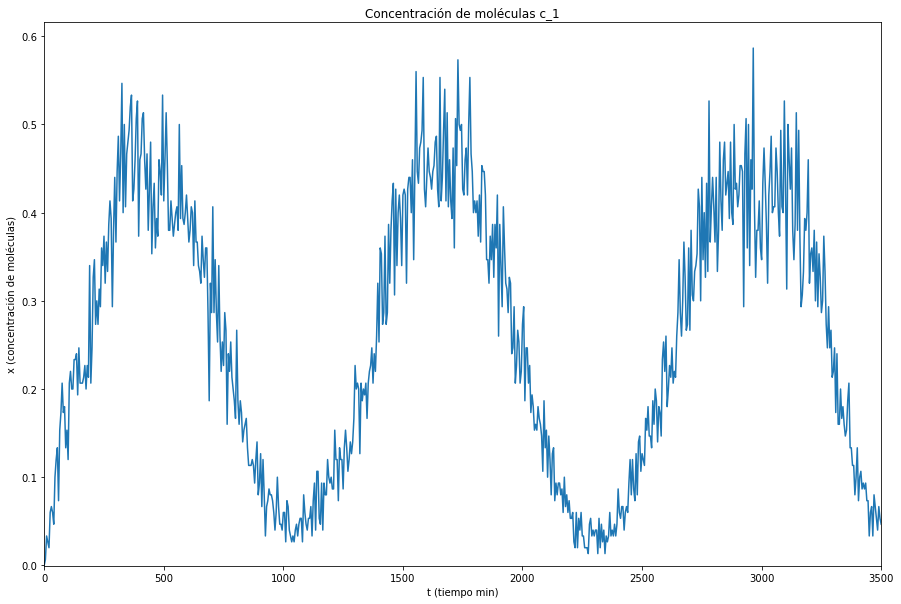

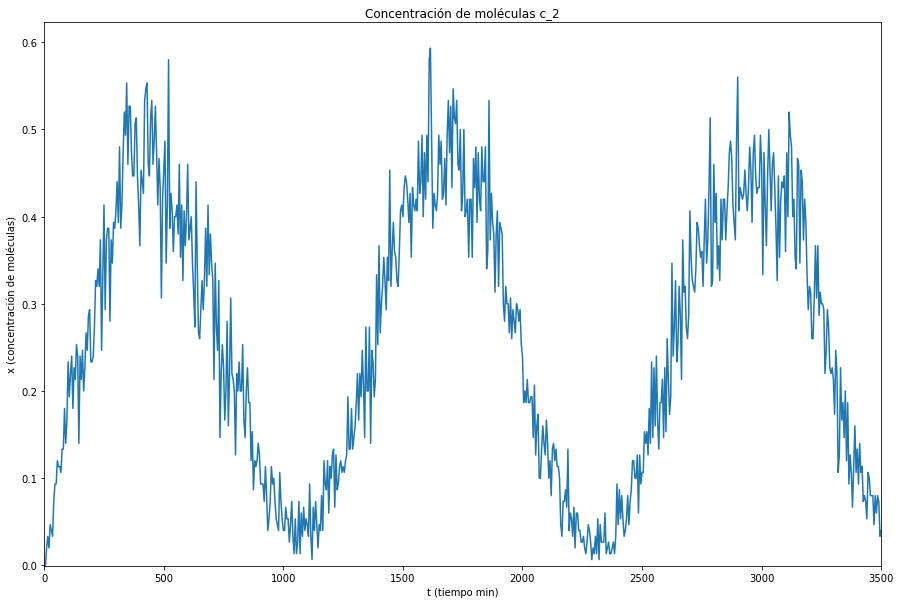

In [1]:
'Algoritmo de Guillespie' 'fosfoliracion caso 2'

#En este programa se implementa el agoritmo de Gillespie para reacciones quimicas
#comunes y convencionales.

# se importan las librerias que seran usadas
import numpy as np
import math 
import random as rnd
import matplotlib.pyplot as plt

#para implementar el algoritmo son necesarias algunas cantidades y definir algunos parametros
#condiciones iniciales de las variables involucradas y el tiempo

def z(t):
    return 0.01*(1+ math.sin(0.005*t))

t0=0 #tiempo inicial
tf= 3500 # tiempo final
t1=5
Omega=150 #tamano del sistema
x=[0, 1500*Omega, 0, 1500*Omega, 100*Omega, 0,0,0] #vector de condiciones iniciales [X0,Y0,Z0]
h= 1 #numero de veces para realizar la misma simulacion
n= len(x) #numero de especies quimicas involucradas

#parametros
k1=[0.01,50,0.01,50,10,1]  #vector de k+
k2=[10,0,10, 0, 10,0.01]  #vector de k-

#matrices de coeficientes estequiometricos
alpha= [[1,1,0,0,0,0,0,0],
        [0,0,0,0,0,0,1,0],
        [0,0,1,1,0,0,0,0],
        [0,0,0,0,0,0,0,1],
        [0,0,1,0,1,0,0,0],
        [0,0,0,0,0,0,0,0]]

beta= [[0,0,0,0,0,0,1,0],
       [1,0,1,0,0,0,0,0],
       [0,0,0,0,0,0,0,1],
       [0,1,0,1,0,0,0,0],
       [0,0,0,0,0,1,0,0],
       [1,0,0,0,0,0,0,0]]

#contruimos la matriz estequiometrica 'evitar editar a partir de esta linea'
S= np.subtract( beta,alpha)
S=S.T
S= np.append(S, -S, axis = 1)

# miscelanea de funciones usadas
def dist_exp(a):# funcion para calcular tau 
    r = rnd.random()
    return -(1./(a))*math.log(r)
    
def numero(S1,a): # funcion que devuelve mu
    l1=0
    l2= S1[0]/a
    l3=0
    r=np.random.rand()
    while l3<1:
        if r<=l2:
            l3=l3+1
            return l1
        else:
            l1=l1+1
            l2= l2 + S1[l1]/a
 
# la funcion que esta a continuacion nos permite realizar  el proceso estocastico hasta que haya 
#pasado T tiempo para un determinado tamano del sistema.

def ev(x,j): #x=condicion inicial, p= numero de pasos, j=tamano del sistema
    t = np.arange(0,tf+t1,t1)
    l3=0
    Z=np.zeros([n,len(t)])
    Y = x
    Z[:,0] = x[:]
    l6=1
    while l6<len(t) or l3<tf:
        if l3<(l6)*t1:
            ni1 = [k1[0]*Y[0]*Y[1]/j,k1[1]*Y[6], k1[2]*Y[2]*Y[3]/j, k1[3]*Y[7], k1[4]*Y[2]*Y[4]/j, j*z(l3),
                   k2[0]*Y[6], 0, k2[2]*Y[7] , 0, k2[4]*Y[5], k2[5]*Y[0]] #vector de propension
            a=sum(ni1)
            tau = dist_exp(a)
            mu = numero(ni1,a)
            Y[:] +=  S[:,mu]
            l3=l3+tau
        else:
            Z[:,l6]=Y[:]
            l6=l6+1
    return t ,  Z

#con la funcion que ya hemos programado, podemos repetirla algun numero determinado de veces,
# para ello claculamos la funcion anterior algun numero de veces y la graficamos 

nom=['Concentración de moléculas z', 'Concentración de moléculas x', 'Concentración de moléculas x_p', 
    'Concentración de moléculas y', 'Concentración de moléculas p', 'Concentración de moléculas c', 
      'Concentración de moléculas c_1', 'Concentración de moléculas c_2' ]

def varios1(x,j,q): #p= pasos  j= tamano del sistema, 
   # q= numero de veces que se realiza la misma simulacion 
    l1=0
    l2=len(x)
    while l1<q:
        T0, l3 =ev(x,j)
        for i in range(l2):
          if i!=3: 
            plt.figure(i,figsize=(15,10))
            plt.plot(T0,l3[i]/j)
            plt.xlabel("t (tiempo min)")
            plt.ylabel("x (concentración de moléculas)")
            plt.title(nom[i])
            plt.xlim(0, tf)
            plt.ylim(-0.0005)
        l1=l1+1
    #plt.legend()
    plt.show()
   
#realizar las graficas de las variables
varios1(x,Omega,h)

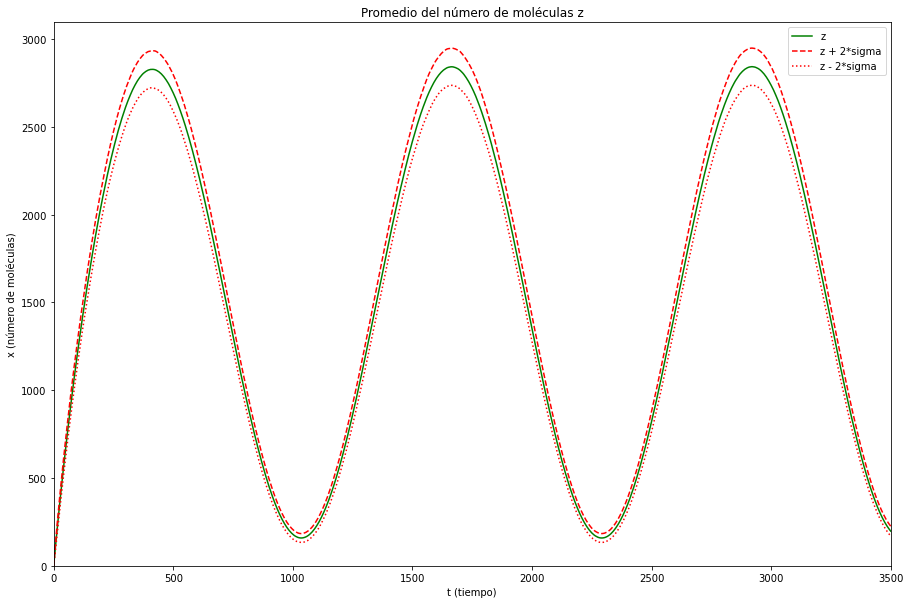

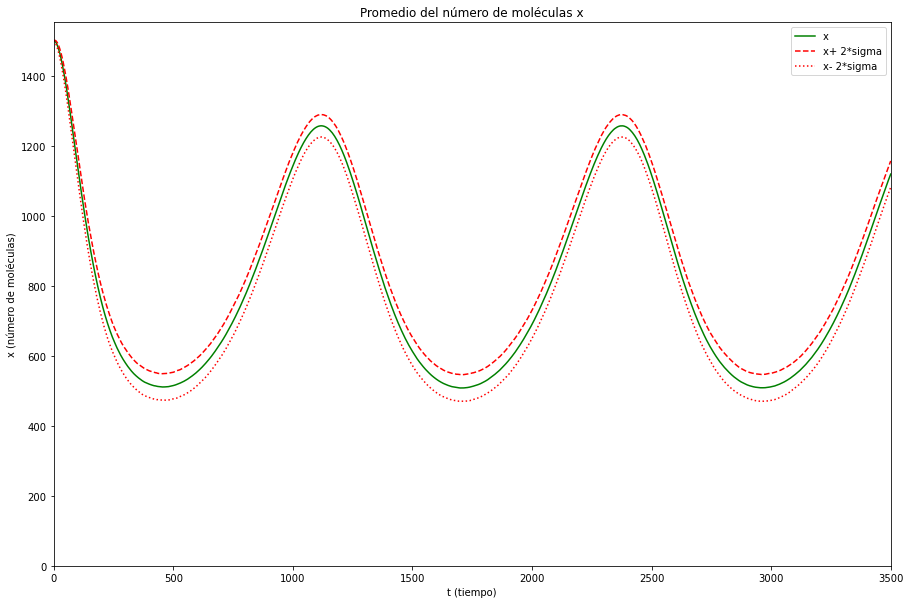

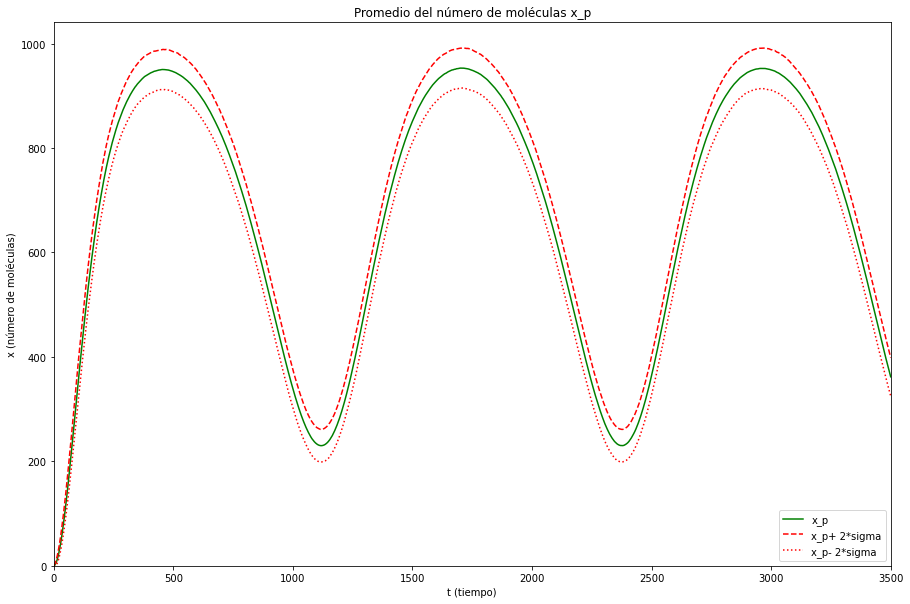

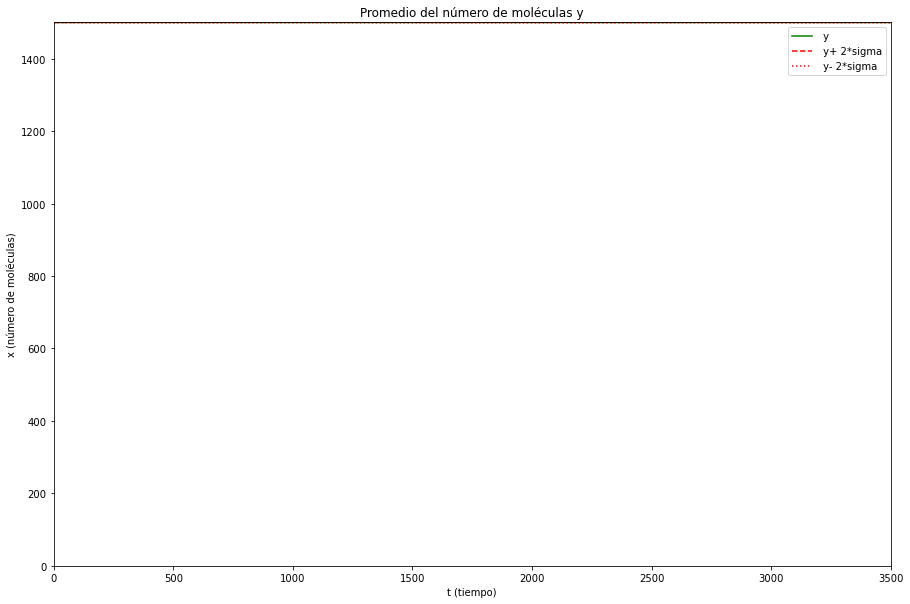

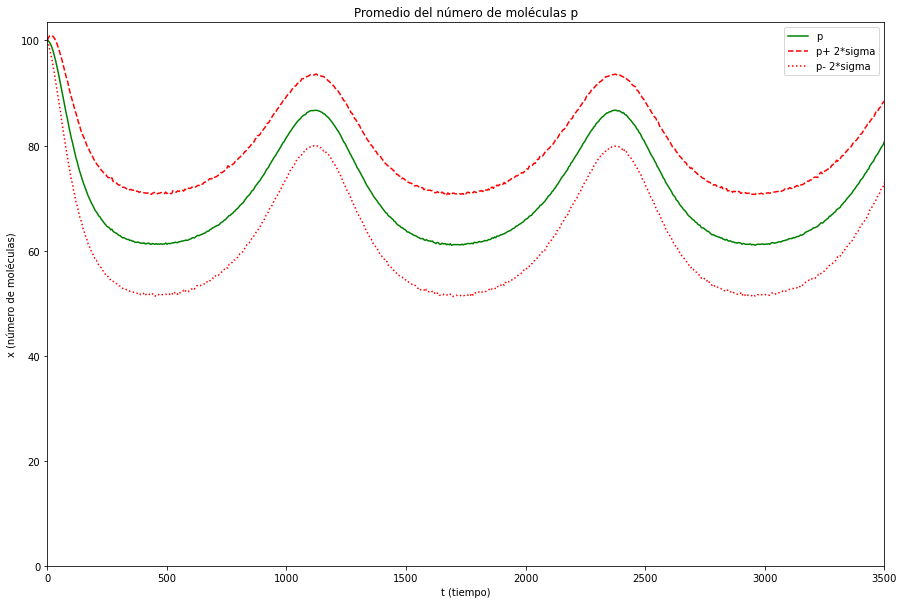

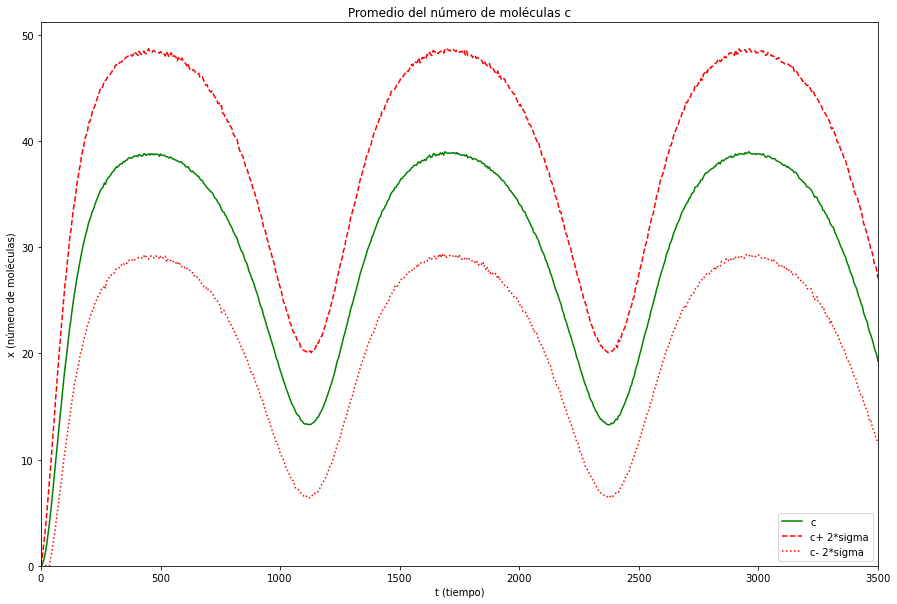

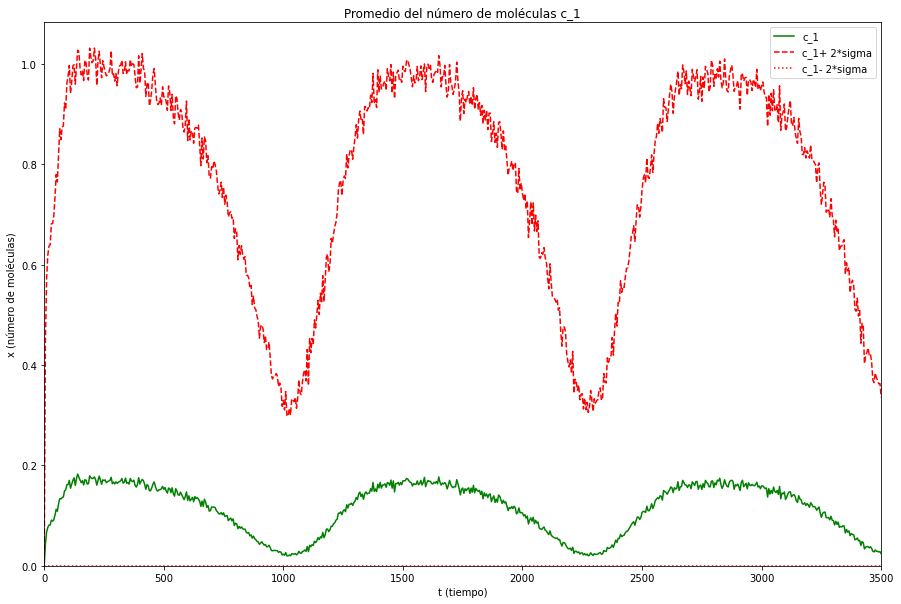

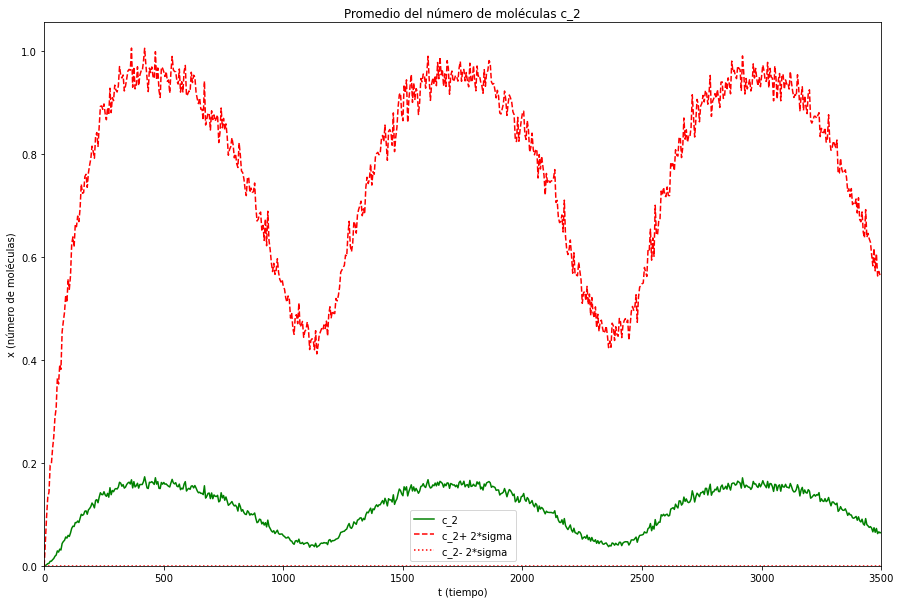

In [6]:
import statistics as st

#funciones para poder graficar
def heav(vec): #funcion que devuelve solo valores mayores que cero
    if vec>=0:
        vec=vec                 
    else:
        vec=0  
    return vec

def varios(x,j,q): #p= pasos  j= tamano del sistema, 
   # q= numero de veces que se realiza la misma simulacion 
    l1=0
    while l1<q:
        if l1==0:
            x=[0, Omega, 0, Omega, 100, 0,0,0] 
            T0, l2 =ev(x,j)
            ky=len(T0)
            l4= np.zeros([n,ky,q])
            l3=np.zeros([n,ky])
            l5=np.zeros([n,ky])
            l6=np.zeros([n,ky])
            l4[:,:,l1]=l2
            l1=l1+1
        else:
            x=[0, Omega, 0, Omega, 100, 0,0,0] 
            T0, l2 =ev(x,j)
            l4[:,:,l1]=l2
            l1=l1+1
    for i in range(n):
        for j2 in range(ky):
            l3[i,j2]=np.mean(l4[i,j2,:])
            l5[i,j2]=math.sqrt(st.pvariance(l4[i,j2,:],l3[i,j2]))
            l6[i,j2]= heav(l3[i,j2]- 2*l5[i,j2] )
    for i in range(n):
        plt.figure(i, figsize=(15,10))
        plt.plot(T0,l3[i],color="green", label=nom2[i])
        plt.plot(T0,l3[i] + 2*l5[i],'--', color="red", label=nom3[i])
        plt.plot(T0,l6[i],':', color="red", label=nom4[i])
        plt.xlabel("t (tiempo)")
        plt.ylabel("x (número de moléculas)")
        plt.title( nom1[i] )
        plt.xlim(0, tf)
        plt.ylim(0)
        plt.legend()
    plt.show()

h=5000
nom1=['Promedio del número de moléculas z', 'Promedio del número de moléculas x', 'Promedio del número de moléculas x_p', 
    'Promedio del número de moléculas y', 'Promedio del número de moléculas p', 'Promedio del número de moléculas c',
     'Promedio del número de moléculas c_1','Promedio del número de moléculas c_2']

nom2=['z', 'x', 'x_p', ' y', 'p', 'c', 'c_1', 'c_2' ]

nom3=['z + 2*sigma', 'x+ 2*sigma', 'x_p+ 2*sigma', ' y+ 2*sigma', 'p+ 2*sigma', 'c+ 2*sigma', 'c_1+ 2*sigma', 'c_2+ 2*sigma' ]

nom4=['z - 2*sigma', 'x- 2*sigma', 'x_p- 2*sigma', ' y- 2*sigma', 'p- 2*sigma', 'c- 2*sigma', 'c_1- 2*sigma', 'c_2- 2*sigma' ]
#realizar las graficas de las variables
varios(x,Omega,h)